In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
number_of_steps = 72
angle_per_step = 360 / number_of_steps
image_count = 5184

In [12]:
all_photos = np.load('all_photos.npy')
all_vectors = np.load('all_vectors.npy')
train_size = int(0.98 * len(all_vectors))

dataset = tf.data.Dataset.from_tensor_slices((all_vectors, all_photos))
dataset = dataset.shuffle(buffer_size=100, seed=42)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

print(len(list(train_dataset)), len(list(test_dataset)))
#for images, labels in train_dataset: print(images.shape, labels.shape)
"""
train_photos= all_photos[:train_size]
train_vectors = all_vectors[:train_size]
test_photos = all_photos[train_size:]
test_vectors = all_vectors[train_size:]
print(str(train_photos.shape) + " " + str(train_vectors.shape))
print(str(test_photos.shape) + " " + str(test_vectors.shape))"""

159 4


'\ntrain_photos= all_photos[:train_size]\ntrain_vectors = all_vectors[:train_size]\ntest_photos = all_photos[train_size:]\ntest_vectors = all_vectors[train_size:]\nprint(str(train_photos.shape) + " " + str(train_vectors.shape))\nprint(str(test_photos.shape) + " " + str(test_vectors.shape))'

In [61]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='linear',  input_shape=((3,))),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.15),
  # tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32*32, activation='relu'),
  tf.keras.layers.Reshape((32,32))
])
model.compile(optimizer='adam',
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])
              
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 8)                 32        
                                                                 
 dense_59 (Dense)            (None, 16)                144       
                                                                 
 dense_60 (Dense)            (None, 32)                544       
                                                                 
 dropout_24 (Dropout)        (None, 32)                0         
                                                                 
 dense_61 (Dense)            (None, 48)                1584      
                                                                 
 dropout_25 (Dropout)        (None, 48)                0         
                                                                 
 dense_62 (Dense)            (None, 64)               

In [66]:
tf.keras.utils.set_random_seed(42)
model.fit(train_dataset, epochs=4)

Epoch 1/4
159/159 [==============================] - 1s 8ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/4
159/159 [==============================] - 1s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/4
159/159 [==============================] - 1s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/4
159/159 [==============================] - 1s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012


In [56]:
def ManualCheck(smartnum):
    pred = model.predict(all_vectors[smartnum].reshape(1, 3))
    truth = all_photos[smartnum]
    finalImage = np.concatenate((pred[0], truth), axis=1)
    print(all_vectors[smartnum])
    plt.imshow(finalImage)
    plt.title("Prediction", loc = 'left')
    plt.title("Ground Truth", loc = 'right')

1/1 [==============================] - 0s 37ms/step
[ 0.08715574 -0.9961947   0.        ]


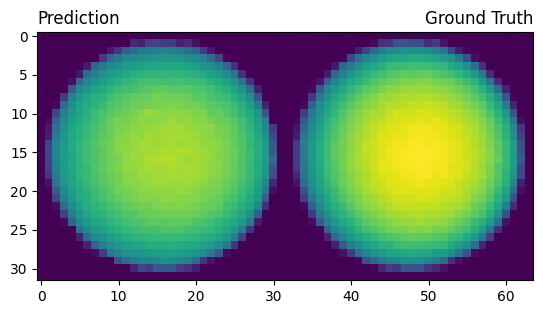

In [71]:
ManualCheck(72)